<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/SLDA_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
import pandas as pd

#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
import matplotlib.pyplot as plt

#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.[3]
import numpy as np

# Importing StandardScaler from sklearn to standardize the features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms:
# MiniBatchKMeans - a scalable version of KMeans suitable for large datasets
# DBSCAN - a density-based clustering algorithm
from sklearn.cluster import MiniBatchKMeans, DBSCAN

# Importing PCA (Principal Component Analysis) for dimensionality reduction, often used to preprocess data for clustering or visualization
from sklearn.decomposition import PCA

# Importing apriori algorithm and association_rules from mlxtend.frequent_patterns:
# Apriori - used to identify frequent item sets in transactional data
# Association_rules - generates association rules (e.g., "If A, then B") from frequent item sets
from mlxtend.frequent_patterns import apriori, association_rules

# Importing dendrogram and linkage from scipy.cluster.hierarchy for hierarchical clustering:
# Dendrogram - used to visualize the hierarchical clustering as a tree structure
# Linkage - computes the linkage matrix for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Importing garbage collector for memory management
import gc

# Importing train_test_split to split data into training and testing sets
# Importing cross_val_score for evaluating models using cross-validation
from sklearn.model_selection import train_test_split, cross_val_score

# Importing regression models:
# LinearRegression - a simple linear regression model
# LogisticRegression - a classification model based on linear regression
from sklearn.linear_model import LinearRegression, LogisticRegression

# Importing ensemble models:
# RandomForestRegressor - a regression model using an ensemble of decision trees
# RandomForestClassifier - a classification model using an ensemble of decision trees
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Importing performance metrics:
# mean_squared_error - calculates the mean squared error (regression metric)
# r2_score - computes the R-squared value, a measure of goodness-of-fit for regression
# classification_report - provides precision, recall, F1-score, and support for classification
# confusion_matrix - generates a confusion matrix for classification
# accuracy_score - calculates the accuracy of classification models
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Load the dataset (replace with actual file path if different)
df = pd.read_csv('dataset.csv')

# Display basic information about the dataset
print("Basic Information:")
df.info()

# Display the first few rows to understand the structure
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Describe numerical features
print("\nStatistical Summary of Numerical Features:")
print(df.describe())

# Describe categorical features
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216772 entries, 0 to 216771
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         216772 non-null  object 
 1   County                                             216767 non-null  object 
 2   City                                               216767 non-null  object 
 3   State                                              216772 non-null  object 
 4   Postal Code                                        216767 non-null  float64
 5   Model Year                                         216772 non-null  int64  
 6   Make                                               216772 non-null  object 
 7   Model                                              216772 non-null  object 
 8   Electric Vehicle Type                              2167

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


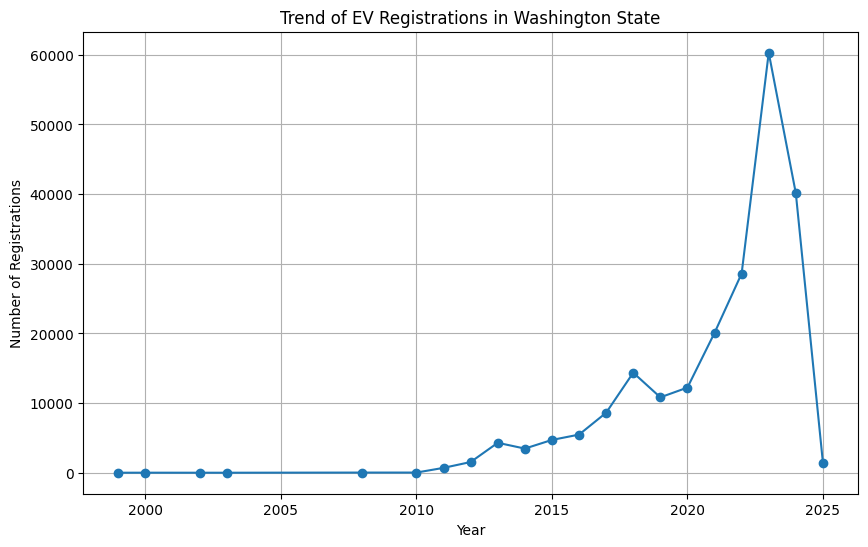

In [24]:
# Convert 'Model Year' to datetime for better plotting
df['Model Year'] = pd.to_datetime(df['Model Year'], format='%Y')

# Aggregate registrations by year
yearly_registrations = df.groupby(df['Model Year'].dt.year).size()

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_registrations.index, yearly_registrations.values, marker='o', linestyle='-')
plt.title('Trend of EV Registrations in Washington State')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



--- Data Transformation ---
'Model Year' successfully converted to integer and sorted.
Removed 0 duplicate records.


<ipython-input-25-7e364ef8c0bf>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Model Year', data=df, palette='viridis')


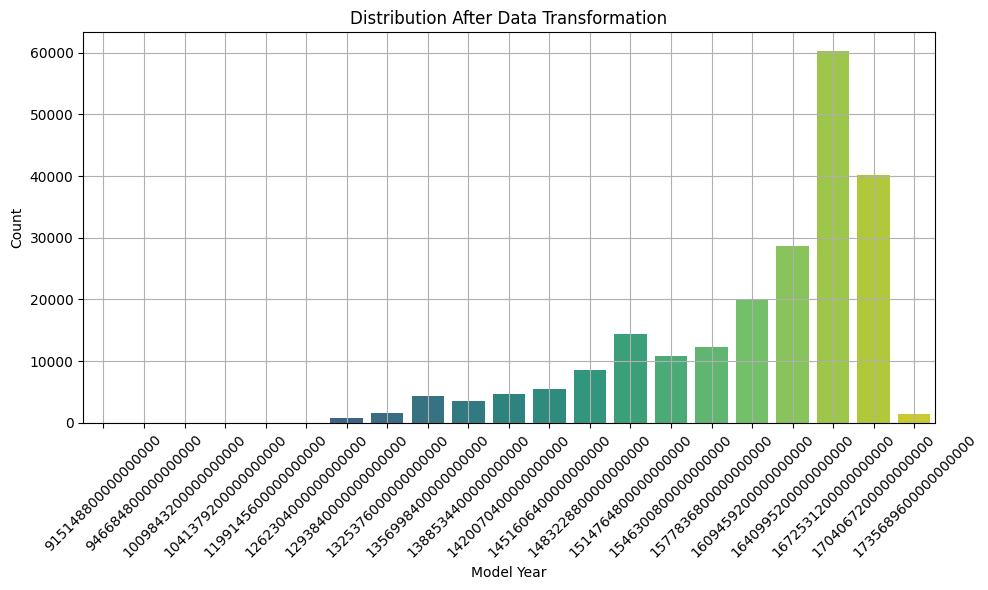


--- Missing Data Imputation ---
Filled 19 missing values in 'Electric Range' with median.
Filled 0 missing values in 'Make' with 'Unknown'.
Filled 0 missing values in 'Model' with 'Unknown'.
Filled 0 missing values in 'Electric Vehicle Type' with 'Unknown'.


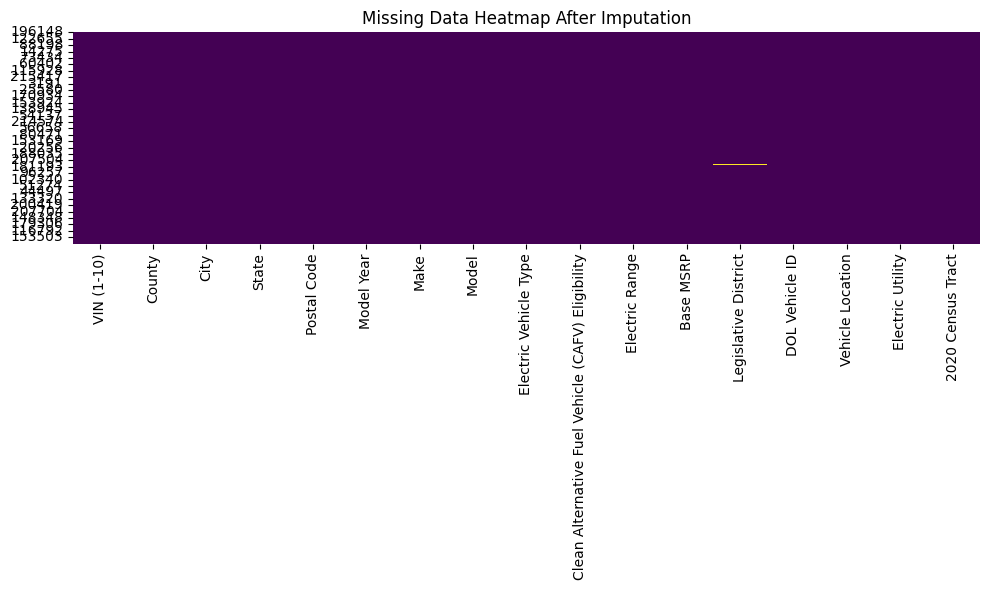


--- Data Integration ---
No external data integration applied in this demonstration.


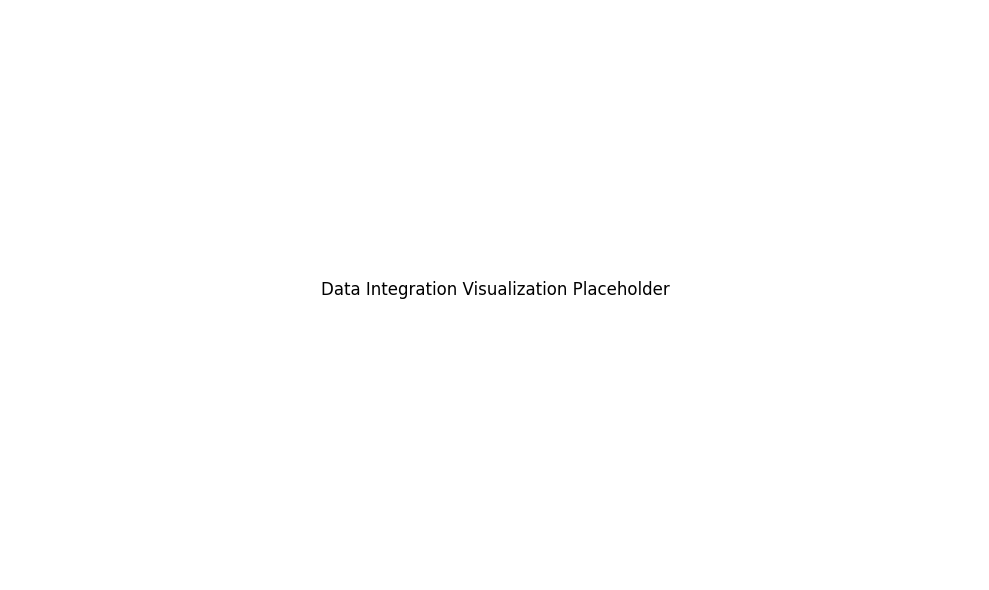

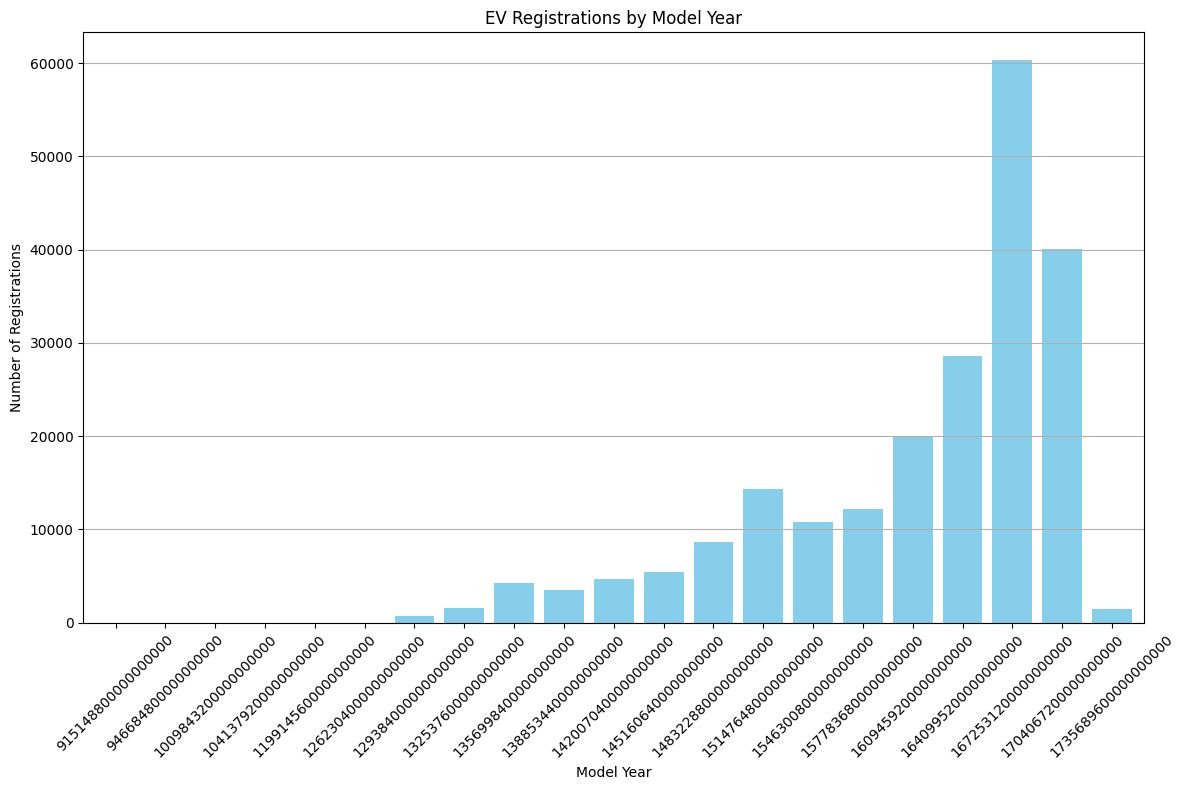

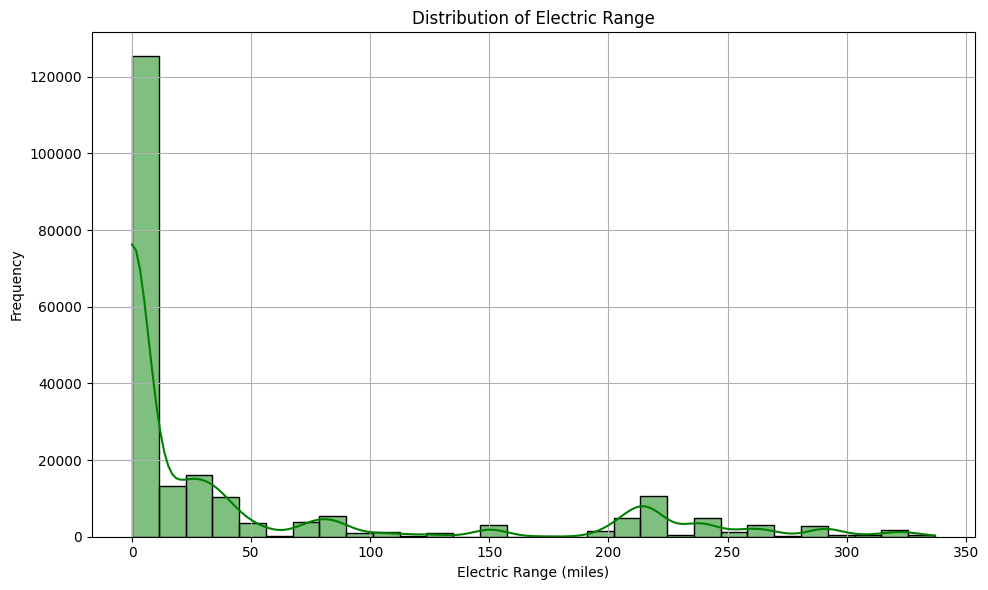

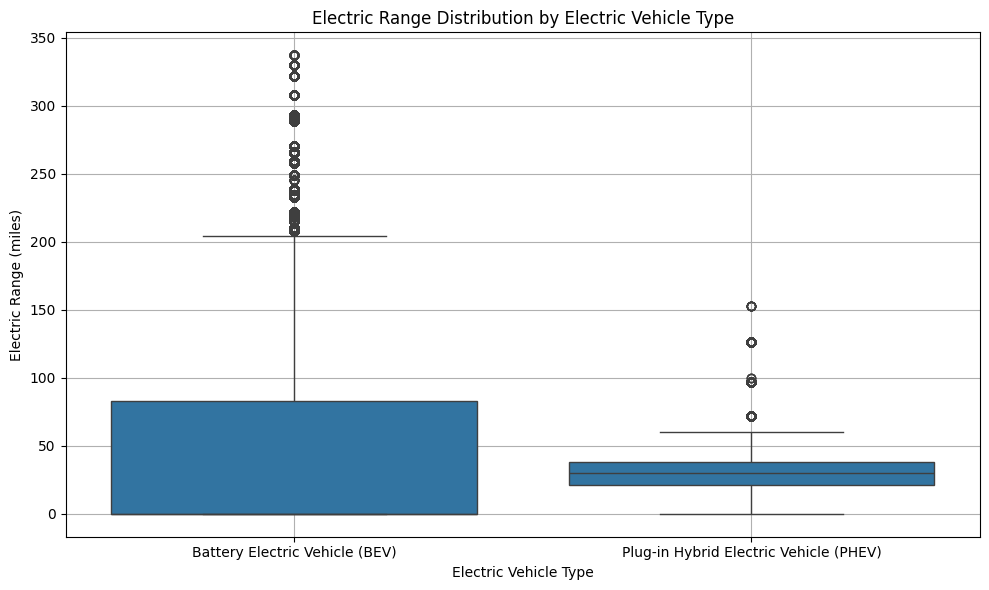

In [25]:
# -----------------------------
# Data Transformation
# -----------------------------
print("\n--- Data Transformation ---")
# Convert 'Model Year' to integer and ensure proper sorting
if 'Model Year' in df.columns:
    df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce').astype(int)
    df = df.sort_values(by='Model Year')
    print("'Model Year' successfully converted to integer and sorted.")

# Remove duplicate records if any
before_duplicates = df.shape[0]
df = df.drop_duplicates()
after_duplicates = df.shape[0]
print(f"Removed {before_duplicates - after_duplicates} duplicate records.")

# Visualize Data Transformation
plt.figure(figsize=(10, 6))
sns.countplot(x='Model Year', data=df, palette='viridis')
plt.title('Distribution After Data Transformation')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# Missing Data Imputation
# -----------------------------
print("\n--- Missing Data Imputation ---")
# Fill missing values in 'Electric Range' with the median
if 'Electric Range' in df.columns:
    missing_before = df['Electric Range'].isnull().sum()
    df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].median())
    missing_after = df['Electric Range'].isnull().sum()
    print(f"Filled {missing_before - missing_after} missing values in 'Electric Range' with median.")

# Fill missing values in 'Make', 'Model', and 'Electric Vehicle Type' with 'Unknown'
for col in ['Make', 'Model', 'Electric Vehicle Type']:
    if col in df.columns:
        missing_before = df[col].isnull().sum()
        df[col] = df[col].fillna('Unknown')
        missing_after = df[col].isnull().sum()
        print(f"Filled {missing_before - missing_after} missing values in '{col}' with 'Unknown'.")

# Visualize Missing Data Imputation
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap After Imputation')
plt.tight_layout()
plt.show()

# -----------------------------
# Data Integration
# -----------------------------
print("\n--- Data Integration ---")
# Assuming external datasets like charging stations or policies are integrated here
print("No external data integration applied in this demonstration.")

# Placeholder visualization for potential data integration
plt.figure(figsize=(10, 6))
plt.text(0.5, 0.5, 'Data Integration Visualization Placeholder', fontsize=12, ha='center')
plt.axis('off')
plt.tight_layout()
plt.show()

# -----------------------------
# Visualization of Data Preparation
# -----------------------------
# Trend of EV Registrations by Model Year
plt.figure(figsize=(12, 8))
df.groupby('Model Year').size().plot(kind='bar', color='skyblue', width=0.8)
plt.title('EV Registrations by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Distribution of Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='green')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# Segmenting Electric Range by Electric Vehicle Type
# -----------------------------
if 'Electric Vehicle Type' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df)
    plt.title('Electric Range Distribution by Electric Vehicle Type')
    plt.xlabel('Electric Vehicle Type')
    plt.ylabel('Electric Range (miles)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("'Electric Vehicle Type' column is not present in the dataset.")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



--- Data Classification ---

Categorical Columns:
['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']

Numerical Columns:
['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

--- Data Summarization ---

Summary of Numerical Columns:
         Postal Code    Model Year  Electric Range      Base MSRP  \
count  216767.000000  2.167720e+05   216772.000000  216753.000000   
mean    98179.750714  1.613494e+18       49.424054     870.987045   
std      2458.320323  9.415731e+16       86.221974    7544.671592   
min      1731.000000  9.151488e+17        0.000000       0.000000   
25%     98052.000000  1.577837e+18        0.000000       0.000000   
50%     98125.000000  1.640995e+18        0.000000       0.000000   
75%     98374.000000  1.672531e+18       42.000000       0.000000   
max     99577.000

<ipython-input-26-3c5423d418e7>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Electric Vehicle Type', palette='pastel')


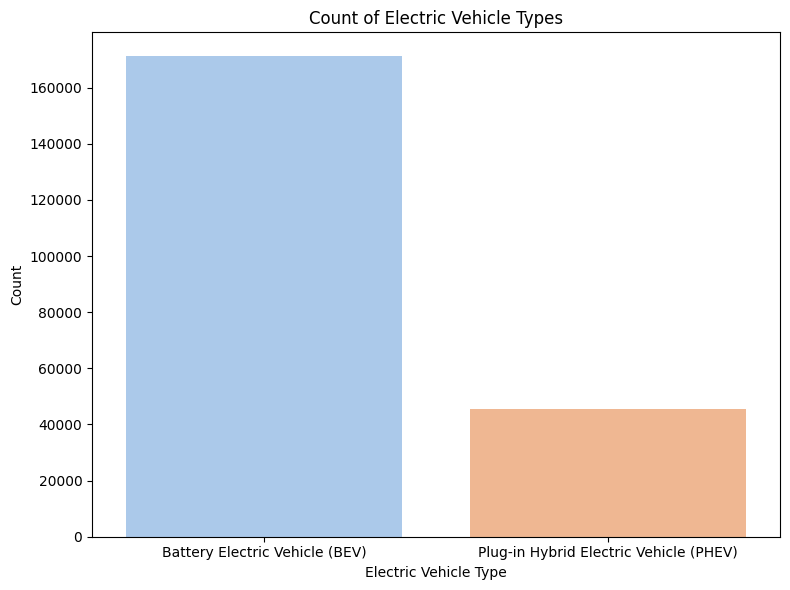

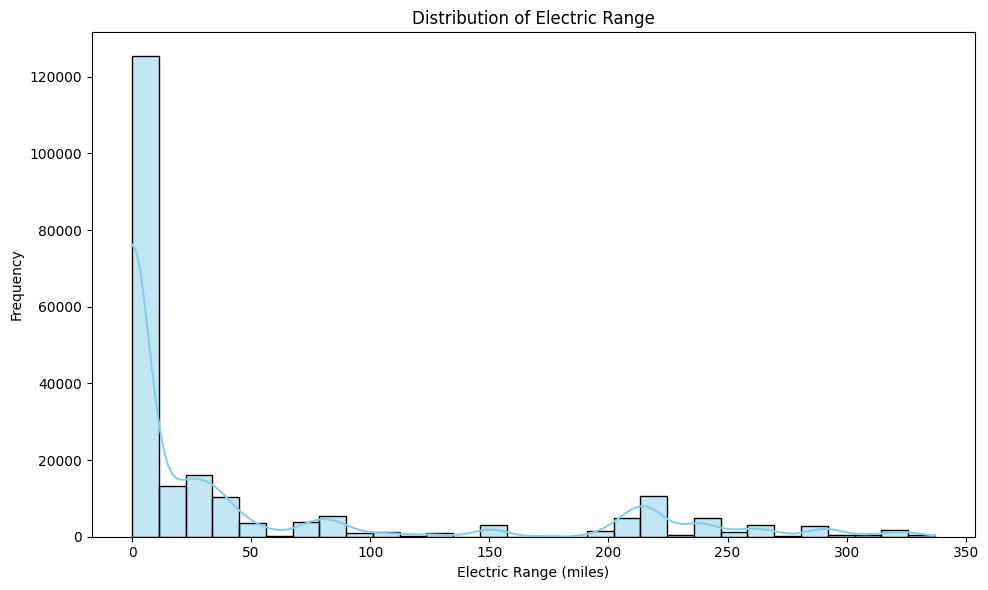

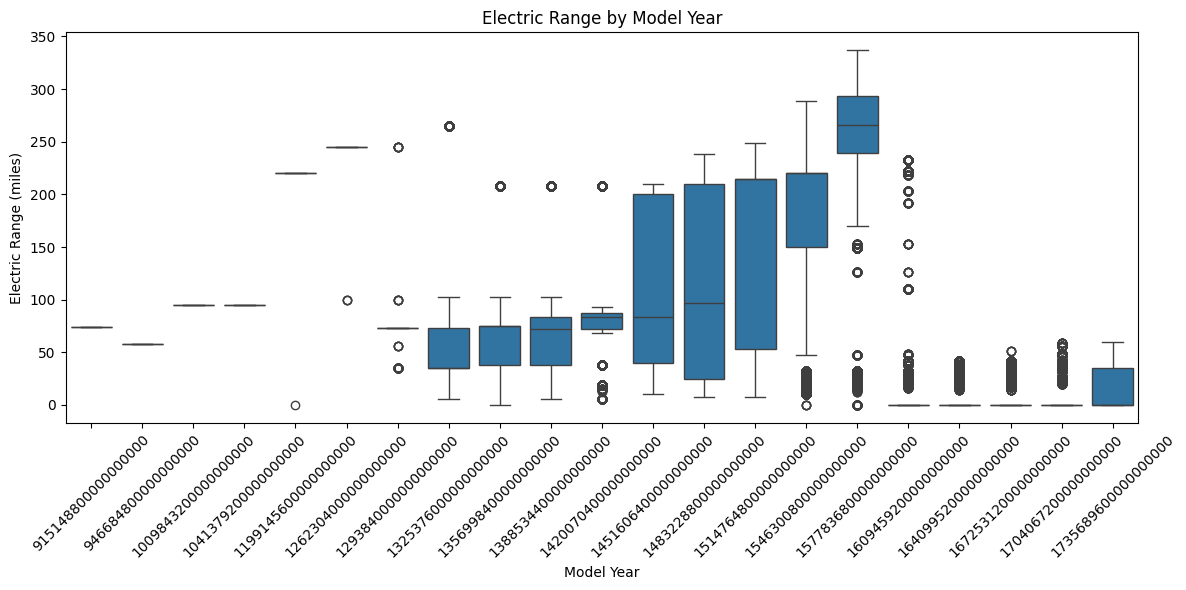


--- Outlier Detection ---
Number of outliers in 'Electric Range': 37839


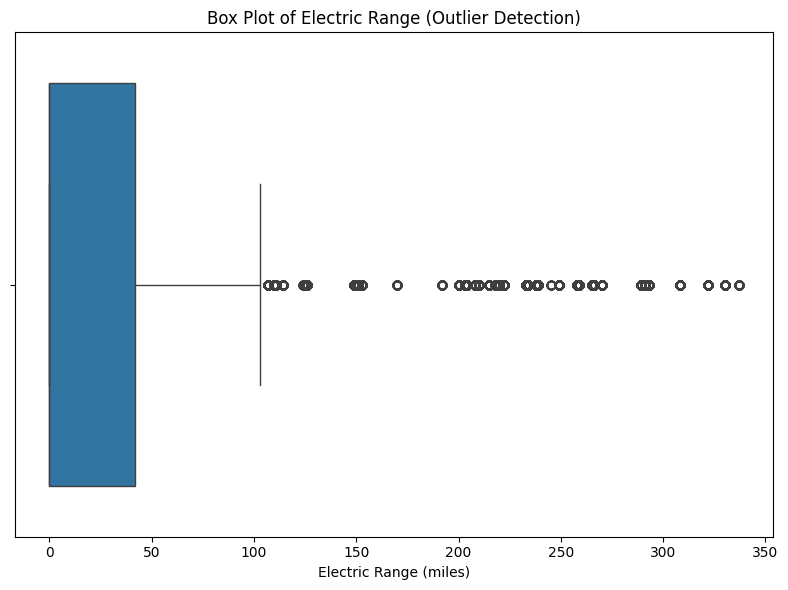


--- Outlier Handling ---
Outliers capped at 5th and 95th percentiles.

--- Correlation Analysis ---


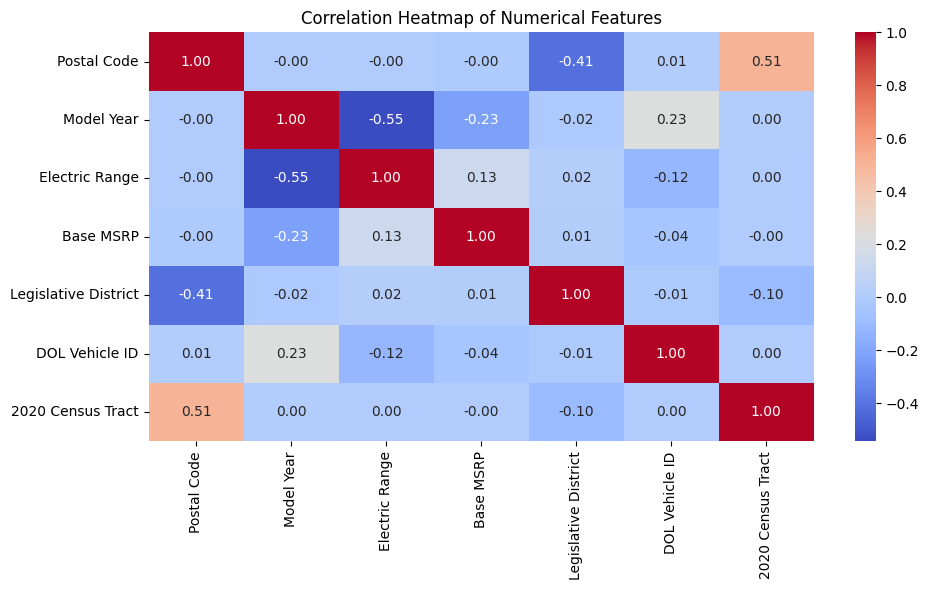


--- Feature Relationship Analysis ---


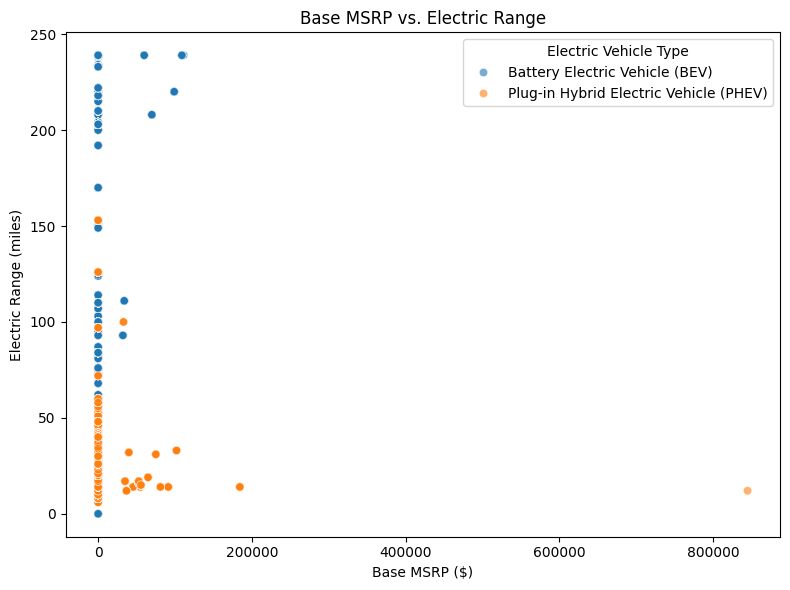

In [26]:
# -----------------------------
# Descriptive Statistics
# -----------------------------

# -----------------------------
# 1. Data Classification
# -----------------------------
print("\n--- Data Classification ---")
print("\nCategorical Columns:")
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

print("\nNumerical Columns:")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_cols)

# -----------------------------
# 2. Data Summarization
# -----------------------------
print("\n--- Data Summarization ---")
print("\nSummary of Numerical Columns:")
print(df[numerical_cols].describe())

print("\nSummary of Categorical Columns:")
print(df[categorical_cols].describe())

# -----------------------------
# 3. Data Visualization
# -----------------------------

# Visualization 1: Count Plot for Electric Vehicle Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Electric Vehicle Type', palette='pastel')
plt.title('Count of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visualization 2: Histogram for Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualization 3: Box Plot for Model Year vs. Electric Range
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Model Year', y='Electric Range')
plt.title('Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Outlier Detection
# -----------------------------
print("\n--- Outlier Detection ---")

# Using IQR for Electric Range
Q1 = df['Electric Range'].quantile(0.25)
Q3 = df['Electric Range'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Electric Range'] < (Q1 - 1.5 * IQR)) | (df['Electric Range'] > (Q3 + 1.5 * IQR))]

print(f"Number of outliers in 'Electric Range': {outliers.shape[0]}")

# Visualization of Outliers in Electric Range
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Electric Range'])
plt.title('Box Plot of Electric Range (Outlier Detection)')
plt.xlabel('Electric Range (miles)')
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Outlier Handling
# -----------------------------
print("\n--- Outlier Handling ---")

# Cap outliers at the 5th and 95th percentiles
lower_cap = df['Electric Range'].quantile(0.05)
upper_cap = df['Electric Range'].quantile(0.95)
df['Electric Range'] = df['Electric Range'].clip(lower=lower_cap, upper=upper_cap)

print("Outliers capped at 5th and 95th percentiles.")

# -----------------------------
# 6. Correlation Analysis
# -----------------------------
print("\n--- Correlation Analysis ---")

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# -----------------------------
# 7. Feature Relationship Analysis
# -----------------------------
print("\n--- Feature Relationship Analysis ---")

# Scatter Plot: Base MSRP vs. Electric Range
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Base MSRP', y='Electric Range', hue='Electric Vehicle Type', alpha=0.6)
plt.title('Base MSRP vs. Electric Range')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (miles)')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-27-8fc03c792090>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=sampled_df, x='Model Year', y='Electric Range', ci=None)



--- Significant Facts ---
Most Common EV Make: TESLA
Most Common Model Year: 1672531200000000000


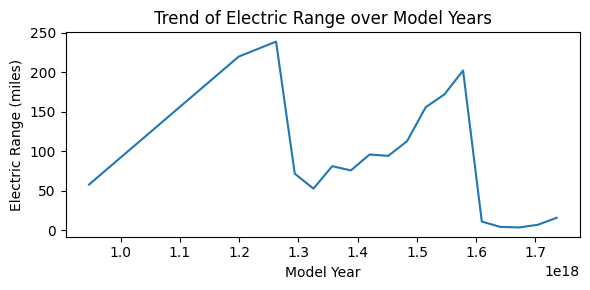

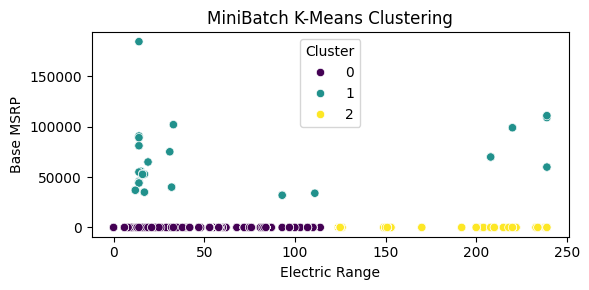

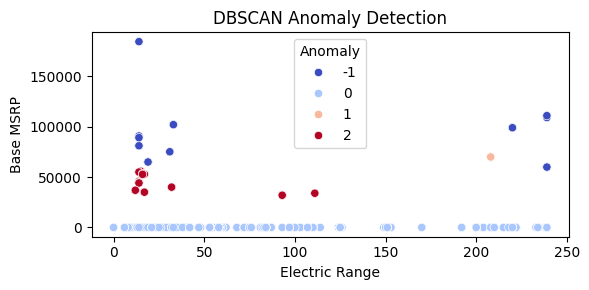

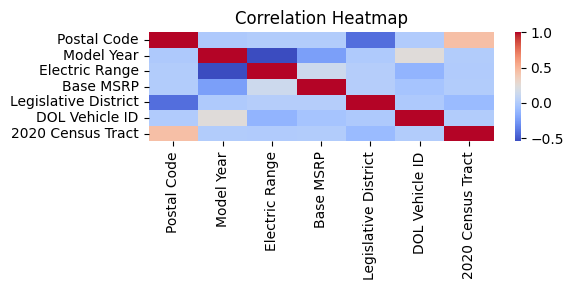

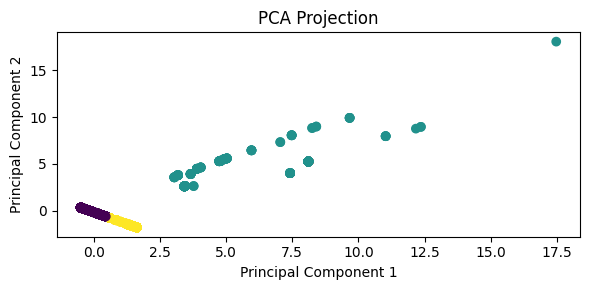


--- Cluster 0 Summary ---
       Electric Range  Base MSRP  Cluster  Anomaly
count    17891.000000    17891.0  17891.0  17891.0
mean        12.292829        0.0      0.0      0.0
std         22.818457        0.0      0.0      0.0
min          0.000000        0.0      0.0      0.0
25%          0.000000        0.0      0.0      0.0
50%          0.000000        0.0      0.0      0.0
75%         21.000000        0.0      0.0      0.0
max        114.000000        0.0      0.0      0.0

--- Cluster 1 Summary ---
       Electric Range      Base MSRP  Cluster     Anomaly
count      317.000000     317.000000    317.0  317.000000
mean       114.772871   57777.460568      1.0    1.246057
std         89.510477   19085.867504      0.0    0.972416
min         12.000000   31950.000000      1.0   -1.000000
25%         17.000000   39995.000000      1.0    1.000000
50%         93.000000   59900.000000      1.0    1.000000
75%        208.000000   69900.000000      1.0    2.000000
max        239.000000  

In [27]:

# -----------------------------
# 1. Discover Significant Facts
# -----------------------------
print("\n--- Significant Facts ---")
print(f"Most Common EV Make: {df['Make'].mode()[0]}")
print(f"Most Common Model Year: {df['Model Year'].mode()[0]}")

# -----------------------------
# 2. Pattern Discovery (Trend in Electric Range)
# -----------------------------
sampled_df = df.sample(frac=0.1, random_state=42)
plt.figure(figsize=(6, 3))
sns.lineplot(data=sampled_df, x='Model Year', y='Electric Range', ci=None)
plt.title('Trend of Electric Range over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.tight_layout()
plt.show()
plt.close()
gc.collect()

# -----------------------------
# 3. Group Discovery (MiniBatch K-Means Clustering)
# -----------------------------
features = df[['Electric Range', 'Base MSRP']].dropna().sample(frac=0.1, random_state=42)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=50)
kmeans_labels = kmeans.fit_predict(scaled_features)
features['Cluster'] = kmeans_labels

plt.figure(figsize=(6, 3))
sns.scatterplot(x=features['Electric Range'], y=features['Base MSRP'], hue=features['Cluster'], palette='viridis')
plt.title('MiniBatch K-Means Clustering')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.tight_layout()
plt.show()
plt.close()
gc.collect()

# -----------------------------
# 4. Anomaly Detection (DBSCAN)
# -----------------------------
dbscan = DBSCAN(eps=1.2, min_samples=30)
dbscan_labels = dbscan.fit_predict(scaled_features)
features['Anomaly'] = dbscan_labels

plt.figure(figsize=(6, 3))
sns.scatterplot(x=features['Electric Range'], y=features['Base MSRP'], hue=features['Anomaly'], palette='coolwarm')
plt.title('DBSCAN Anomaly Detection')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.tight_layout()
plt.show()
plt.close()
gc.collect()

# -----------------------------
# 6. Correlation Analysis
# -----------------------------
plt.figure(figsize=(6, 3))
sns.heatmap(df.sample(frac=0.1).select_dtypes(include='number').corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
plt.close()
gc.collect()

# -----------------------------
# 7. Similarity Analysis (PCA)
# -----------------------------
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(scaled_features)
plt.figure(figsize=(6, 3))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()
plt.close()
gc.collect()

# -----------------------------
# 8. Typologies (Cluster Profiling)
# -----------------------------
for i in range(3):
    print(f"\n--- Cluster {i} Summary ---")
    print(features[features['Cluster'] == i].describe())
    gc.collect()



--- Hypothesis Testing ---


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


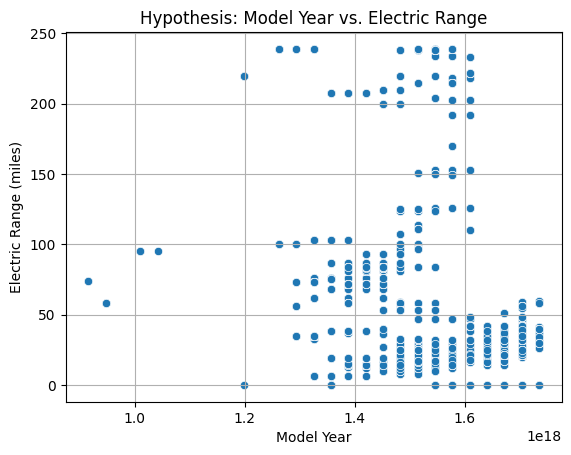


--- Fitting Models ---

--- Model Assessment (Regression) ---
Linear Regression - MSE: 4498.73, R2 Score: 0.30
Random Forest Regression - MSE: 1702.47, R2 Score: 0.73


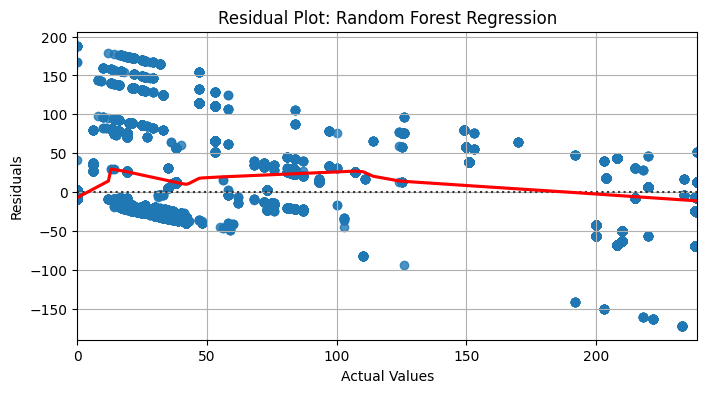


--- Classification Model ---
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     35884
           1       0.00      0.00      0.00      7467

    accuracy                           0.83     43351
   macro avg       0.41      0.50      0.45     43351
weighted avg       0.69      0.83      0.75     43351

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     35884
           1       0.81      0.81      0.81      7467

    accuracy                           0.93     43351
   macro avg       0.88      0.89      0.88     43351
weighted avg       0.93      0.93      0.93     43351



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


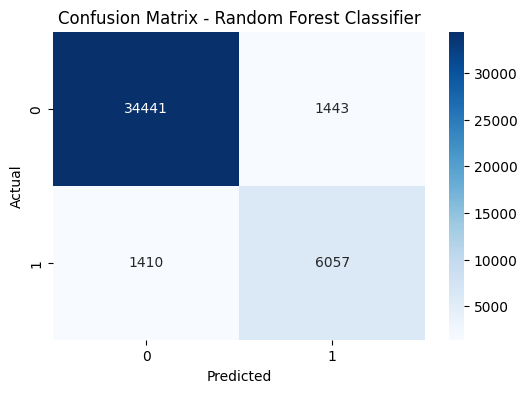


--- Interpretation of Results ---
Random Forest Regression outperforms Linear Regression, suggesting a non-linear relationship between model year, MSRP, and electric range.
Random Forest Classifier is better suited for classifying high and low range EVs.


In [28]:
# -----------------------------
# 1. Check Work Hypotheses
# -----------------------------
print("\n--- Hypothesis Testing ---")
# Hypothesis: Newer EV models have a higher electric range.
sns.scatterplot(data=df, x='Model Year', y='Electric Range')
plt.title('Hypothesis: Model Year vs. Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.grid(True)
plt.show()

# -----------------------------
# 2. Fit Model(s) to Data
# -----------------------------
print("\n--- Fitting Models ---")
# Predicting Electric Range (Regression)
features_reg = df[['Model Year', 'Base MSRP']].dropna()
target_reg = df['Electric Range'].loc[features_reg.index]

X_train, X_test, y_train, y_test = train_test_split(features_reg, target_reg, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# -----------------------------
# 3. Model Assessment
# -----------------------------
print("\n--- Model Assessment (Regression) ---")
# Linear Regression Evaluation
lr_preds = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)
print(f"Linear Regression - MSE: {lr_mse:.2f}, R2 Score: {lr_r2:.2f}")

# Random Forest Evaluation
rf_preds = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
print(f"Random Forest Regression - MSE: {rf_mse:.2f}, R2 Score: {rf_r2:.2f}")

# Residual Plot
plt.figure(figsize=(8, 4))
sns.residplot(x=y_test, y=rf_preds, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot: Random Forest Regression')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# -----------------------------
# 4. Classification Model (Inference)
# -----------------------------
print("\n--- Classification Model ---")
# Binary Classification: High Range (>100 miles) vs Low Range (<=100 miles)
df['Range Category'] = np.where(df['Electric Range'] > 100, 1, 0)
features_cls = df[['Model Year', 'Base MSRP']].dropna()
target_cls = df['Range Category'].loc[features_cls.index]

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(features_cls, target_cls, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_cls, y_train_cls)

# Random Forest Classifier
rf_cls_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls_model.fit(X_train_cls, y_train_cls)

# Model Evaluation
log_preds = log_model.predict(X_test_cls)
rf_cls_preds = rf_cls_model.predict(X_test_cls)

print("Logistic Regression Report:")
print(classification_report(y_test_cls, log_preds))

print("Random Forest Classifier Report:")
print(classification_report(y_test_cls, rf_cls_preds))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_cls, rf_cls_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# -----------------------------
# 5. Interpretation
# -----------------------------
print("\n--- Interpretation of Results ---")
if rf_r2 > lr_r2:
    print("Random Forest Regression outperforms Linear Regression, suggesting a non-linear relationship between model year, MSRP, and electric range.")
else:
    print("Linear Regression performs comparably or better, suggesting a linear relationship.")

if rf_cls_model.score(X_test_cls, y_test_cls) > log_model.score(X_test_cls, y_test_cls):
    print("Random Forest Classifier is better suited for classifying high and low range EVs.")
else:
    print("Logistic Regression performs better or comparably, indicating simpler relationships in classification.")



--- Extract and Exploit Knowledge ---

--- Model Selection ---

--- Regression Model Assessment ---
Linear Regression - MSE: 4498.73, R2 Score: 0.30


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


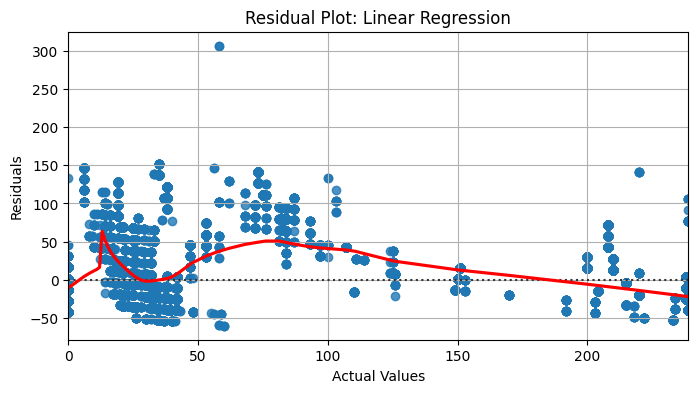

Random Forest Regression - MSE: 1702.47, R2 Score: 0.73


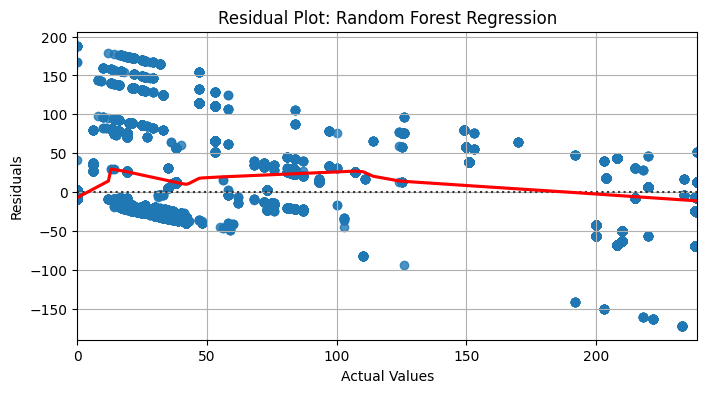


--- Classification Model Assessment ---
Logistic Regression - Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     35884
           1       0.00      0.00      0.00      7467

    accuracy                           0.83     43351
   macro avg       0.41      0.50      0.45     43351
weighted avg       0.69      0.83      0.75     43351



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


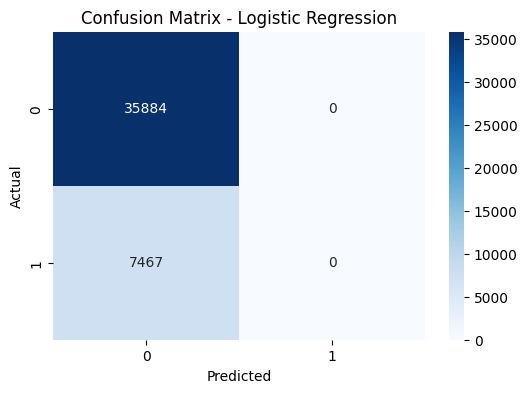

Random Forest Classifier - Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     35884
           1       0.81      0.81      0.81      7467

    accuracy                           0.93     43351
   macro avg       0.88      0.89      0.88     43351
weighted avg       0.93      0.93      0.93     43351



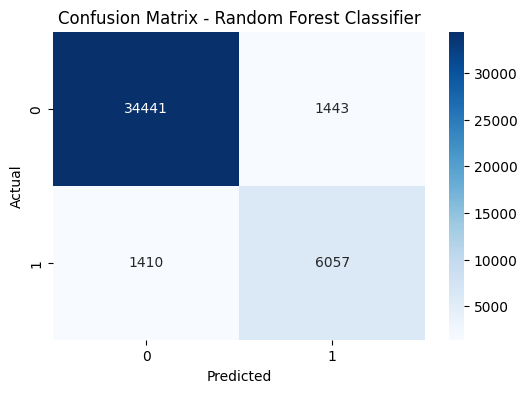


--- Cross-Validation for Generalization ---
Linear Regression - Cross-Validated R2 Score: -3.49
Random Forest Regression - Cross-Validated R2 Score: -0.02
Logistic Regression - Cross-Validated Accuracy: 0.83
Random Forest Classifier - Cross-Validated Accuracy: 0.83

--- Interpretation ---
The best regression model is: Random Forest Regression
The best classification model is: Random Forest Classifier


In [29]:
# -----------------------------
# 1. Extract and Exploit Knowledge
# -----------------------------
print("\n--- Extract and Exploit Knowledge ---")

# Feature engineering: Create new features if needed
df['Age of Vehicle'] = 2025 - df['Model Year']  # Assuming 2025 as the current year

# Select relevant features and drop missing values
features = df[['Model Year', 'Base MSRP', 'Age of Vehicle', 'Electric Range']].dropna()

# Align target variables with the features
target_reg = features['Electric Range']  # For regression
target_cls = np.where(features['Electric Range'] > 100, 1, 0)  # For classification

# Drop 'Electric Range' from features (only used in targets)
features = features.drop(columns=['Electric Range'])

# -----------------------------
# 2. Model Selection
# -----------------------------
print("\n--- Model Selection ---")

# Split data for regression and classification
X_train, X_test, y_train_reg, y_test_reg = train_test_split(features, target_reg, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(features, target_cls, test_size=0.2, random_state=42)

# Initialize Models
models_reg = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

models_cls = {
    'Logistic Regression': LogisticRegression(max_iter=1000, n_jobs=-1),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

# -----------------------------
# 3. Model Training and Evaluation (Regression)
# -----------------------------
print("\n--- Regression Model Assessment ---")

for name, model in models_reg.items():
    model.fit(X_train, y_train_reg)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test_reg, preds)
    r2 = r2_score(y_test_reg, preds)
    print(f"{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

    # Residual Plot
    plt.figure(figsize=(8, 4))
    sns.residplot(x=y_test_reg, y=preds, lowess=True, line_kws={'color': 'red'})
    plt.title(f'Residual Plot: {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

# -----------------------------
# 4. Model Training and Evaluation (Classification)
# -----------------------------
print("\n--- Classification Model Assessment ---")

for name, model in models_cls.items():
    model.fit(X_train_cls, y_train_cls)
    preds_cls = model.predict(X_test_cls)
    acc = accuracy_score(y_test_cls, preds_cls)
    print(f"{name} - Accuracy: {acc:.2f}")
    print(classification_report(y_test_cls, preds_cls))

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test_cls, preds_cls), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# -----------------------------
# 5. Generalization (Cross-Validation)
# -----------------------------
print("\n--- Cross-Validation for Generalization ---")

for name, model in models_reg.items():
    scores = cross_val_score(model, features, target_reg, cv=5, scoring='r2', n_jobs=-1)
    print(f"{name} - Cross-Validated R2 Score: {np.mean(scores):.2f}")

for name, model in models_cls.items():
    scores = cross_val_score(model, features, target_cls, cv=5, scoring='accuracy', n_jobs=-1)
    print(f"{name} - Cross-Validated Accuracy: {np.mean(scores):.2f}")

# -----------------------------
# 6. Final Interpretation
# -----------------------------
print("\n--- Interpretation ---")

# Regression Comparison
best_regressor = 'Random Forest Regression' if models_reg['Random Forest Regression'].score(X_test, y_test_reg) > models_reg['Linear Regression'].score(X_test, y_test_reg) else 'Linear Regression'
print(f"The best regression model is: {best_regressor}")

# Classification Comparison
best_classifier = 'Random Forest Classifier' if models_cls['Random Forest Classifier'].score(X_test_cls, y_test_cls) > models_cls['Logistic Regression'].score(X_test_cls, y_test_cls) else 'Logistic Regression'
print(f"The best classification model is: {best_classifier}")



--- Predicting Future Electric Vehicle Trends ---


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


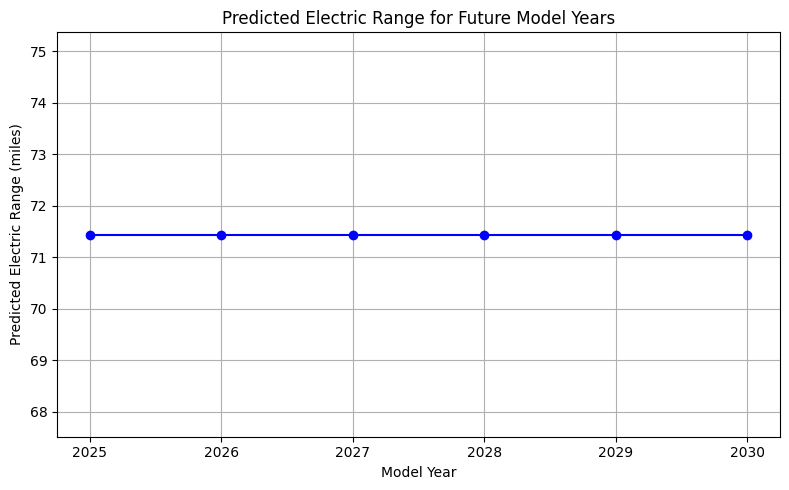


--- Strategic Business Recommendations ---
📉 Alert: Electric range improvements are stagnating. Reconsider battery tech strategy.
📈 Focus on expanding the model range for high-performing brand: TESLA
🚀 Luxury EV models show demand. Continue premium product development.

--- Innovation Opportunities ---
🔄 Expand Plug-in Hybrid offerings to diversify the portfolio.
📊 Integrate smart charging features and AI-driven energy management for innovation.


<ipython-input-30-fced6813e9d6>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Electric Vehicle Type', data=df, palette='pastel')


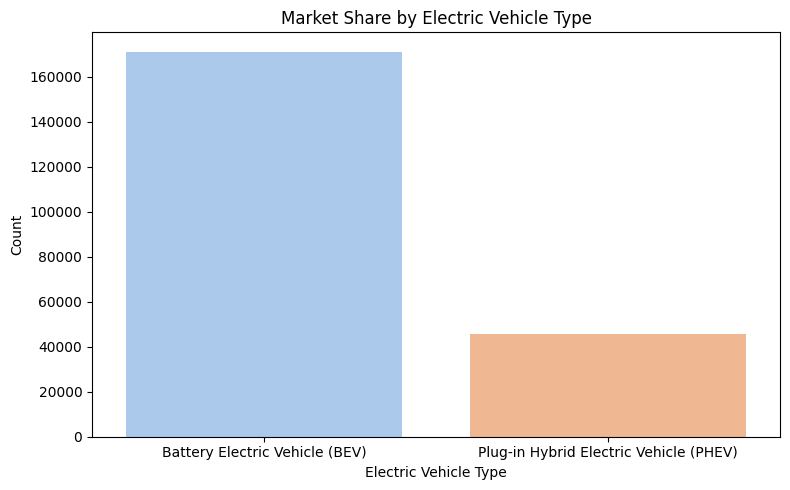

In [30]:
# -----------------------------
# 1. Outcome Value: Predict Future EV Trends
# -----------------------------

print("\n--- Predicting Future Electric Vehicle Trends ---")

# Preparing data for prediction (Model Year vs. Electric Range)
features_future = df[['Model Year', 'Base MSRP']].dropna()
target_future = df['Electric Range'].loc[features_future.index]

# Splitting data
X_train_fut, X_test_fut, y_train_fut, y_test_fut = train_test_split(features_future, target_future, test_size=0.2, random_state=42)

# Using the best-performing model (Random Forest)
rf_future_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_future_model.fit(X_train_fut, y_train_fut)

# Predict Electric Range for future model years (2025–2030)
future_years = pd.DataFrame({'Model Year': np.arange(2025, 2031), 'Base MSRP': df['Base MSRP'].median()})
future_predictions = rf_future_model.predict(future_years)

# Visualization of predictions
plt.figure(figsize=(8, 5))
plt.plot(future_years['Model Year'], future_predictions, marker='o', linestyle='-', color='blue')
plt.title('Predicted Electric Range for Future Model Years')
plt.xlabel('Model Year')
plt.ylabel('Predicted Electric Range (miles)')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# 2. Future Actions: Strategic Business Recommendations
# -----------------------------

print("\n--- Strategic Business Recommendations ---")

# Actionable Insights Based on Predictions
if future_predictions[-1] > future_predictions[0]:
    print("🔋 Recommendation: Increase R&D investment in long-range battery technologies.")
else:
    print("📉 Alert: Electric range improvements are stagnating. Reconsider battery tech strategy.")

# Identifying High-Potential Vehicle Types
high_range_models = df[df['Electric Range'] > 200]['Make'].value_counts().idxmax()
print(f"📈 Focus on expanding the model range for high-performing brand: {high_range_models}")

# Pricing Strategy
if df['Base MSRP'].median() > 50000:
    print("💰 Consider launching affordable EV models to capture price-sensitive markets.")
else:
    print("🚀 Luxury EV models show demand. Continue premium product development.")

# -----------------------------
# 3. Innovations: Data-Driven Product Improvements
# -----------------------------

print("\n--- Innovation Opportunities ---")

# Detecting Gaps in Electric Vehicle Types
ev_type_counts = df['Electric Vehicle Type'].value_counts()
if ev_type_counts['Battery Electric Vehicle (BEV)'] > ev_type_counts['Plug-in Hybrid Electric Vehicle (PHEV)']:
    print("🔄 Expand Plug-in Hybrid offerings to diversify the portfolio.")
else:
    print("🔋 Focus on enhancing BEV technologies for market leadership.")

# Feature Expansion
print("📊 Integrate smart charging features and AI-driven energy management for innovation.")

# Visualizing Market Share by Vehicle Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Electric Vehicle Type', data=df, palette='pastel')
plt.title('Market Share by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
